In [16]:
from keras.models import load_model
import scipy.io as sio 
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.python.client import device_lib

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    

list_test=[]
list_target=[]
def read_input(fileName):
    i=sio.loadmat(fileName)
    TTrain=i['TTrain']
    XTrain=i['XTrain']

    XTrain=XTrain.reshape(-1)
    TTrain=TTrain.reshape(-1)
    #list_target.append(TTrain)
    test=np.transpose(XTrain).reshape(-1)
    test2=np.transpose(TTrain).reshape(-1)
    list_target.append(test2)

    
    for i in range(len(test)):
        test[i]=np.transpose(np.array(test[i]))
        list_test.append(test[i])
        
#There are total files (1-7 except 6)
trainFileNum=7

#File test number
textFileNumber=8
i=1    
while i <= trainFileNum:
    #Skip file number 6
    if(i==6):
        i+=1
        continue
    else:
        fileName="inputFeatures"+str(i)+"_m.mat"
        read_input(fileName)
        i+=1
        
list_test=np.vstack(list_test)
scaler = StandardScaler()
scaler=scaler.fit(list_test)
scaled_list_test=scaler.transform(list_test)
#fileName='inputFeatures1.mat'

#TTest=np.transpose(TTest)
#TTrain=np.transpose(TTrain)
#XTrain=np.transpose(XTrain)
#XTest=np.transpose(XTest)

# for j in range(len(test2)):  
#     test2[j]=np.transpose(np.array(test2[j]))
#     list_test.append(test2[j])  

print(scaled_list_test.shape)

#print(scaled_list_test)
#print(scaled_list_test.shape)

XT_s_stack=list()
i=0
while i+50 <= (len(scaled_list_test)):
    XT_s_stack.append(scaled_list_test[i:i+50])
    i=i+50

#print(listTest)
XT_s_stack=np.stack(XT_s_stack)

list_target=np.hstack(list_target)
print(list_target.shape)


#cutPoint=np.shape(TTest.reshape(-1))[0]
#print(np.shape(TTest.reshape(-1))[0])

#XTrain_s=XT_s_stack[:-cutPoint,:,:]
#XTest_s=XT_s_stack[-cutPoint:,:,:]
print(XT_s_stack.shape)

XTrain_s=XT_s_stack
TTrain=list_target

length = 50
n_features = 4
model = Sequential()
model.add(LSTM(150,input_shape=(length,n_features)))
#model.add(tf.keras.layers.RNN(tf.keras.layers.LSTMCell(150)),input_shape=(length,n_features))
#model.add(Dense(16, activation= 'elu', kernel_initializer='normal'))

#model.add(Dense(1, activation='linear'))
model.add(Dense(1))

#opt=Adam(learning_rate=0.02)
#model.compile(optimizer=opt, loss='mean_squared_logarithmic_error')

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
model.summary()

with tf.device('/gpu:0'):
    model.fit(XTrain_s,np.array(TTrain),epochs=1000,verbose=2)
    



#TTest=TTest.reshape(len(TTest),1)
Test=np.transpose(TTest)
# #print(np.array(TTest))

# test=np.transpose(XTrain).flatten()
# #print(test)
# list_test=list()
# for i in test:
#     #test[i]=np.transpose(np.array(i))
#     list_test.append(np.array(i))

# list_test=np.vstack(list_test)
# x=np.stack(list_test)



(480100, 4)
(9602,)
(9602, 50, 4)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150)               93000     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 93,151
Trainable params: 93,151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
301/301 - 5s - loss: 1.2757 - 5s/epoch - 18ms/step
Epoch 2/1000
301/301 - 2s - loss: 0.8521 - 2s/epoch - 8ms/step
Epoch 3/1000
301/301 - 2s - loss: 0.7754 - 2s/epoch - 8ms/step
Epoch 4/1000
301/301 - 2s - loss: 1.3004 - 2s/epoch - 8ms/step
Epoch 5/1000
301/301 - 2s - loss: 0.2044 - 2s/epoch - 8ms/step
Epoch 6/1000
301/301 - 2s - loss: 0.2342 - 2s/epoch - 8ms/step
Epoch 7/1000
301/301 - 3s - loss:

Epoch 118/1000
301/301 - 2s - loss: 0.0591 - 2s/epoch - 8ms/step
Epoch 119/1000
301/301 - 3s - loss: 0.0557 - 3s/epoch - 9ms/step
Epoch 120/1000
301/301 - 2s - loss: 0.0515 - 2s/epoch - 8ms/step
Epoch 121/1000
301/301 - 2s - loss: 0.0575 - 2s/epoch - 8ms/step
Epoch 122/1000
301/301 - 2s - loss: 0.0679 - 2s/epoch - 8ms/step
Epoch 123/1000
301/301 - 2s - loss: 0.0560 - 2s/epoch - 8ms/step
Epoch 124/1000
301/301 - 2s - loss: 0.0621 - 2s/epoch - 8ms/step
Epoch 125/1000
301/301 - 3s - loss: 0.0513 - 3s/epoch - 9ms/step
Epoch 126/1000
301/301 - 2s - loss: 0.0449 - 2s/epoch - 8ms/step
Epoch 127/1000
301/301 - 2s - loss: 0.0497 - 2s/epoch - 8ms/step
Epoch 128/1000
301/301 - 2s - loss: 0.0422 - 2s/epoch - 8ms/step
Epoch 129/1000
301/301 - 2s - loss: 0.0447 - 2s/epoch - 8ms/step
Epoch 130/1000
301/301 - 2s - loss: 0.0637 - 2s/epoch - 8ms/step
Epoch 131/1000
301/301 - 2s - loss: 0.0485 - 2s/epoch - 8ms/step
Epoch 132/1000
301/301 - 3s - loss: 0.0458 - 3s/epoch - 9ms/step
Epoch 133/1000
301/301 - 

301/301 - 3s - loss: 0.0069 - 3s/epoch - 8ms/step
Epoch 245/1000
301/301 - 3s - loss: 0.0038 - 3s/epoch - 9ms/step
Epoch 246/1000
301/301 - 2s - loss: 0.0043 - 2s/epoch - 8ms/step
Epoch 247/1000
301/301 - 2s - loss: 0.0041 - 2s/epoch - 8ms/step
Epoch 248/1000
301/301 - 2s - loss: 0.0038 - 2s/epoch - 8ms/step
Epoch 249/1000
301/301 - 3s - loss: 0.0026 - 3s/epoch - 9ms/step
Epoch 250/1000
301/301 - 3s - loss: 0.0054 - 3s/epoch - 8ms/step
Epoch 251/1000
301/301 - 3s - loss: 0.0046 - 3s/epoch - 9ms/step
Epoch 252/1000
301/301 - 3s - loss: 0.0077 - 3s/epoch - 9ms/step
Epoch 253/1000
301/301 - 3s - loss: 0.0049 - 3s/epoch - 9ms/step
Epoch 254/1000
301/301 - 2s - loss: 0.0031 - 2s/epoch - 8ms/step
Epoch 255/1000
301/301 - 3s - loss: 0.0033 - 3s/epoch - 9ms/step
Epoch 256/1000
301/301 - 3s - loss: 0.0069 - 3s/epoch - 8ms/step
Epoch 257/1000
301/301 - 3s - loss: 0.0058 - 3s/epoch - 9ms/step
Epoch 258/1000
301/301 - 3s - loss: 0.0158 - 3s/epoch - 9ms/step
Epoch 259/1000
301/301 - 2s - loss: 0.00

Epoch 371/1000
301/301 - 3s - loss: 0.0026 - 3s/epoch - 9ms/step
Epoch 372/1000
301/301 - 3s - loss: 0.0017 - 3s/epoch - 9ms/step
Epoch 373/1000
301/301 - 3s - loss: 0.0010 - 3s/epoch - 9ms/step
Epoch 374/1000
301/301 - 3s - loss: 0.0047 - 3s/epoch - 9ms/step
Epoch 375/1000
301/301 - 3s - loss: 0.0036 - 3s/epoch - 8ms/step
Epoch 376/1000
301/301 - 3s - loss: 0.0080 - 3s/epoch - 9ms/step
Epoch 377/1000
301/301 - 3s - loss: 0.0072 - 3s/epoch - 9ms/step
Epoch 378/1000
301/301 - 3s - loss: 0.0035 - 3s/epoch - 9ms/step
Epoch 379/1000
301/301 - 3s - loss: 0.0024 - 3s/epoch - 9ms/step
Epoch 380/1000
301/301 - 3s - loss: 0.0068 - 3s/epoch - 9ms/step
Epoch 381/1000
301/301 - 3s - loss: 0.0088 - 3s/epoch - 9ms/step
Epoch 382/1000
301/301 - 3s - loss: 0.0018 - 3s/epoch - 8ms/step
Epoch 383/1000
301/301 - 3s - loss: 0.0013 - 3s/epoch - 9ms/step
Epoch 384/1000
301/301 - 3s - loss: 9.3399e-04 - 3s/epoch - 9ms/step
Epoch 385/1000
301/301 - 3s - loss: 0.0016 - 3s/epoch - 9ms/step
Epoch 386/1000
301/30

Epoch 496/1000
301/301 - 3s - loss: 5.4306e-04 - 3s/epoch - 9ms/step
Epoch 497/1000
301/301 - 3s - loss: 4.8433e-04 - 3s/epoch - 9ms/step
Epoch 498/1000
301/301 - 3s - loss: 0.0043 - 3s/epoch - 9ms/step
Epoch 499/1000
301/301 - 3s - loss: 0.0025 - 3s/epoch - 9ms/step
Epoch 500/1000
301/301 - 3s - loss: 0.0019 - 3s/epoch - 9ms/step
Epoch 501/1000
301/301 - 3s - loss: 7.7505e-04 - 3s/epoch - 9ms/step
Epoch 502/1000
301/301 - 3s - loss: 0.0059 - 3s/epoch - 10ms/step
Epoch 503/1000
301/301 - 3s - loss: 0.0018 - 3s/epoch - 11ms/step
Epoch 504/1000
301/301 - 4s - loss: 0.0012 - 4s/epoch - 12ms/step
Epoch 505/1000
301/301 - 3s - loss: 6.8308e-04 - 3s/epoch - 9ms/step
Epoch 506/1000
301/301 - 3s - loss: 0.0046 - 3s/epoch - 11ms/step
Epoch 507/1000
301/301 - 4s - loss: 0.0017 - 4s/epoch - 12ms/step
Epoch 508/1000
301/301 - 3s - loss: 6.8083e-04 - 3s/epoch - 10ms/step
Epoch 509/1000
301/301 - 3s - loss: 5.6725e-04 - 3s/epoch - 11ms/step
Epoch 510/1000
301/301 - 3s - loss: 5.3107e-04 - 3s/epoch -

Epoch 618/1000
301/301 - 3s - loss: 0.0036 - 3s/epoch - 11ms/step
Epoch 619/1000
301/301 - 3s - loss: 8.5965e-04 - 3s/epoch - 9ms/step
Epoch 620/1000
301/301 - 3s - loss: 5.3727e-04 - 3s/epoch - 10ms/step
Epoch 621/1000
301/301 - 3s - loss: 3.6526e-04 - 3s/epoch - 9ms/step
Epoch 622/1000
301/301 - 3s - loss: 3.5598e-04 - 3s/epoch - 9ms/step
Epoch 623/1000
301/301 - 3s - loss: 4.2613e-04 - 3s/epoch - 9ms/step
Epoch 624/1000
301/301 - 3s - loss: 3.7485e-04 - 3s/epoch - 11ms/step
Epoch 625/1000
301/301 - 3s - loss: 3.0556e-04 - 3s/epoch - 10ms/step
Epoch 626/1000
301/301 - 3s - loss: 0.0018 - 3s/epoch - 9ms/step
Epoch 627/1000
301/301 - 3s - loss: 0.0079 - 3s/epoch - 9ms/step
Epoch 628/1000
301/301 - 3s - loss: 0.0021 - 3s/epoch - 9ms/step
Epoch 629/1000
301/301 - 3s - loss: 0.0015 - 3s/epoch - 10ms/step
Epoch 630/1000
301/301 - 3s - loss: 0.0019 - 3s/epoch - 10ms/step
Epoch 631/1000
301/301 - 3s - loss: 9.8959e-04 - 3s/epoch - 10ms/step
Epoch 632/1000
301/301 - 3s - loss: 4.1029e-04 - 3s

Epoch 738/1000
301/301 - 3s - loss: 1.7800e-04 - 3s/epoch - 9ms/step
Epoch 739/1000
301/301 - 3s - loss: 3.5186e-04 - 3s/epoch - 9ms/step
Epoch 740/1000
301/301 - 3s - loss: 3.8479e-04 - 3s/epoch - 9ms/step
Epoch 741/1000
301/301 - 3s - loss: 0.0025 - 3s/epoch - 10ms/step
Epoch 742/1000
301/301 - 3s - loss: 0.0012 - 3s/epoch - 9ms/step
Epoch 743/1000
301/301 - 3s - loss: 5.6755e-04 - 3s/epoch - 10ms/step
Epoch 744/1000
301/301 - 3s - loss: 2.8786e-04 - 3s/epoch - 9ms/step
Epoch 745/1000
301/301 - 3s - loss: 2.4157e-04 - 3s/epoch - 9ms/step
Epoch 746/1000
301/301 - 3s - loss: 4.6058e-04 - 3s/epoch - 9ms/step
Epoch 747/1000
301/301 - 3s - loss: 2.7150e-04 - 3s/epoch - 9ms/step
Epoch 748/1000
301/301 - 3s - loss: 4.6513e-04 - 3s/epoch - 9ms/step
Epoch 749/1000
301/301 - 3s - loss: 2.2716e-04 - 3s/epoch - 9ms/step
Epoch 750/1000
301/301 - 3s - loss: 0.0029 - 3s/epoch - 9ms/step
Epoch 751/1000
301/301 - 3s - loss: 0.0013 - 3s/epoch - 9ms/step
Epoch 752/1000
301/301 - 3s - loss: 0.0011 - 3s/

Epoch 858/1000
301/301 - 3s - loss: 1.5067e-04 - 3s/epoch - 9ms/step
Epoch 859/1000
301/301 - 3s - loss: 0.0059 - 3s/epoch - 9ms/step
Epoch 860/1000
301/301 - 3s - loss: 0.0027 - 3s/epoch - 10ms/step
Epoch 861/1000
301/301 - 3s - loss: 0.0013 - 3s/epoch - 9ms/step
Epoch 862/1000
301/301 - 3s - loss: 4.2117e-04 - 3s/epoch - 9ms/step
Epoch 863/1000
301/301 - 3s - loss: 3.5340e-04 - 3s/epoch - 9ms/step
Epoch 864/1000
301/301 - 3s - loss: 0.0015 - 3s/epoch - 9ms/step
Epoch 865/1000
301/301 - 3s - loss: 9.0364e-04 - 3s/epoch - 10ms/step
Epoch 866/1000
301/301 - 3s - loss: 3.2283e-04 - 3s/epoch - 9ms/step
Epoch 867/1000
301/301 - 3s - loss: 2.9549e-04 - 3s/epoch - 9ms/step
Epoch 868/1000
301/301 - 3s - loss: 2.4899e-04 - 3s/epoch - 9ms/step
Epoch 869/1000
301/301 - 3s - loss: 2.5760e-04 - 3s/epoch - 9ms/step
Epoch 870/1000
301/301 - 3s - loss: 2.1530e-04 - 3s/epoch - 9ms/step
Epoch 871/1000
301/301 - 3s - loss: 3.6791e-04 - 3s/epoch - 10ms/step
Epoch 872/1000
301/301 - 3s - loss: 1.9938e-04 

Epoch 978/1000
301/301 - 3s - loss: 0.0017 - 3s/epoch - 9ms/step
Epoch 979/1000
301/301 - 3s - loss: 4.8342e-04 - 3s/epoch - 11ms/step
Epoch 980/1000
301/301 - 3s - loss: 2.1134e-04 - 3s/epoch - 9ms/step
Epoch 981/1000
301/301 - 3s - loss: 1.4422e-04 - 3s/epoch - 11ms/step
Epoch 982/1000
301/301 - 3s - loss: 1.3004e-04 - 3s/epoch - 10ms/step
Epoch 983/1000
301/301 - 3s - loss: 1.1983e-04 - 3s/epoch - 10ms/step
Epoch 984/1000
301/301 - 3s - loss: 1.1818e-04 - 3s/epoch - 10ms/step
Epoch 985/1000
301/301 - 3s - loss: 1.5520e-04 - 3s/epoch - 12ms/step
Epoch 986/1000
301/301 - 3s - loss: 0.0070 - 3s/epoch - 11ms/step
Epoch 987/1000
301/301 - 3s - loss: 0.0043 - 3s/epoch - 10ms/step
Epoch 988/1000
301/301 - 3s - loss: 0.0017 - 3s/epoch - 10ms/step
Epoch 989/1000
301/301 - 3s - loss: 0.0016 - 3s/epoch - 10ms/step
Epoch 990/1000
301/301 - 3s - loss: 9.0214e-04 - 3s/epoch - 9ms/step
Epoch 991/1000
301/301 - 3s - loss: 4.2980e-04 - 3s/epoch - 10ms/step
Epoch 992/1000
301/301 - 3s - loss: 3.7009e

NameError: name 'XTest_s' is not defined

In [13]:
list_target_noob=[]


def read_input(fileName):
    i=sio.loadmat(fileName)
    TTrain=i['TTrain']
    XTrain=i['XTrain']

    XTrain=XTrain.reshape(-1)
    TTrain=TTrain.reshape(-1)
    
    test2=np.transpose(TTrain).reshape(-1)
    list_target_noob.append(test2)

i=1
trainFileNum=7
while i <= trainFileNum:
    #Skip file number 6
    if(i==6):
        i+=1
        continue
    else:
        fileName="inputFeatures"+str(i)+"_m.mat"
        read_input(fileName)
        i+=1
        
print(np.hstack(list_target_noob).shape)

(9602,)


In [2]:
print(XTrain_s.shape)
print(TTrain.shape)

(1339, 50, 4)
(1339,)


In [23]:
test_fileName="inputFeatures8_m.mat"
i=sio.loadmat(test_fileName)
TTest=i['TTrain']
XTest=i['XTrain']
XTest_s=np.array(XTest.reshape(-1))
print(XTest_s)

testStack=list()
for i in XTest_s:
    testStack.append(np.transpose(i))
testStack=np.stack(testStack)    

with tf.device('/cpu:0'):
    Y_hat=model.predict(testStack)

[array([[1.34957930e-01, 1.42265423e-01, 1.35279972e-01, 1.35296546e-01,
         1.35365027e-01, 1.47580502e-01, 1.29248740e-01, 1.29440539e-01,
         1.29739350e-01, 1.30195152e-01, 1.30634317e-01, 1.31081929e-01,
         1.31430921e-01, 1.31714304e-01, 1.31856227e-01, 1.31932252e-01,
         1.32097499e-01, 1.32179050e-01, 1.32261403e-01, 1.32487445e-01,
         1.32739821e-01, 1.32935048e-01, 1.33117773e-01, 1.33413526e-01,
         1.33732780e-01, 1.33797532e-01, 1.33794543e-01, 1.33826779e-01,
         1.34029919e-01, 1.34265625e-01, 1.34394550e-01, 1.34530788e-01,
         1.34735781e-01, 1.34961144e-01, 1.35132283e-01, 1.35353427e-01,
         1.35496276e-01, 1.35563184e-01, 1.35720393e-01, 1.43056713e-01,
         1.36104623e-01, 1.49718786e-01, 1.27574712e-01, 1.33752806e-01,
         1.46915523e-01, 1.28101531e-01, 1.27523298e-01, 1.24964908e-01,
         1.23884092e-01, 1.43908171e-01],
        [1.49511232e-02, 3.08495467e-02, 1.49760833e-02, 1.49142187e-02,
         

177/177 [==============================] - 3s 15ms/step


In [28]:
print(Y_hat.shape)
TTest=np.transpose(TTest)
print(TTest.shape)

(5639, 1)
(5639, 1)


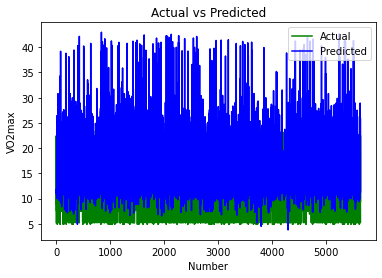

<Figure size 7236x2196 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(TTest,color='green',label='Actual')
plt.plot(Y_hat,color='blue',label='Predicted')
plt.xlabel('Number')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
#plt.figure(figsize=(100,100))

plt.show()
fig = plt.gcf()
fig.set_size_inches(100.5, 30.5)
fig.savefig('multiple_subject_input_pred_7.png', dpi=150)

In [34]:
#print(Y_hat)
#TTest=TTest.reshape(len(TTest),1)
#TTest=np.transpose(TTest)
#print(TTest)
results = model.evaluate(XTest_s,TTest) 
print("test loss", results)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [17]:
model.save('Multiple_Subject_Input_v1.h5')